<a href="https://colab.research.google.com/github/MWH997/AdvancedML-NeuropsychiatricDisorder-SchizophreniaCaseStudy/blob/master/Advanced_Machine_Learning_Approaches_in_Neuropsychiatric_Disorder_Analysis_A_Synthetic_Case_Study_on_Schizophrenia_like_Illness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Advanced Machine Learning Approaches in Neuropsychiatric Disorder Analysis: A Synthetic Case Study on Schizophrenia-like Illness


## Md Wahid Hassan


</center>




---

> This assignment involves creating a comprehensive report using Jupyter Notebook to apply data pre-processing, feature engineering techniques, and machine learning models introduced in the initial segment of the academic program. Students are encouraged to utilize a variety of machine learning algorithms and preprocessing steps as deemed suitable for the given task.



> The focus of the assignment is on a synthetic dataset representing a 'schizophrenia-like illness'. Comprising lifestyle and symptom information for 5,000 fictional individuals, the dataset is designed to allow students to explore fundamental machine learning concepts and the challenges posed by biases in data, particularly those related to race, gender, and socio-economic status. The primary target variable in this dataset is 'Diagnosis', a binary indicator distinguishing between the presence or absence of the schizophrenia-like illness.

> The assignment is segmented into five parts, each contributing to the overall evaluation. These parts include preprocessing and exploratory data analysis (EDA), unsupervised machine learning for data insights, supervised machine learning for classification or regression, comprehensive documentation of the workflow in the Jupyter Notebook, and a presentation summarizing the findings. Students are expected to address issues like missing, duplicated, or outlier values, transform and encode data, engage in feature engineering, and produce insightful visualizations and analyses. The unsupervised and supervised analyses demand the use of appropriate algorithms and metrics, while the report should be well-organized, with clear explanations, tables, and plots.


---



<center>

# CODE

</center>

# Importing Libraries

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from scipy.stats import skew
import pandas as pd

In [ ]:
# Setting up pandas to show all the columns
pd.set_option('display.max_columns', None)

In [ ]:
# Read data
df = pd.read_csv('./MS4S16_Dataset.csv')

# Exploratory Data Analysis

In [ ]:
# This function fills in null values using skewness

def fill_null_values(df, col):
  # Calculate skewness
  col_skewness = skew(df[col].dropna())
  # Fill in null values with mean or median based on skewness
  if abs(col_skewness) > 1:
      df[col].fillna(df[col].median(), inplace=True)
      print(f"{col} is filled with Median for having a skewness of {col_skewness}")
  else:
      df[col].fillna(df[col].mean(), inplace=True)
      print(f"{col} is filled with Mean for having a skewness of {col_skewness}")

In [ ]:
# Shape of the dataframe

print(df.shape)

(5000, 27)


In [ ]:
# Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           5000 non-null   int64  
 1   Anhedonia           5000 non-null   float64
 2   Apathy              5000 non-null   float64
 3   Appetite            5000 non-null   float64
 4   Concentration       5000 non-null   float64
 5   Content             5000 non-null   float64
 6   Delay               5000 non-null   object 
 7   Delusion            5000 non-null   float64
 8   Dep_Mood            5000 non-null   float64
 9   Focus               5000 non-null   float64
 10  Hallucination       5000 non-null   float64
 11  Housing             5000 non-null   object 
 12  Intrusive_Thoughts  4170 non-null   float64
 13  Participant         5000 non-null   int64  
 14  Passive             5000 non-null   float64
 15  Pregnant            2762 non-null   float64
 16  Psycho

In [ ]:
# Statistical Summary of the numerical columns

df.describe()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Participant,Passive,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4170.000000,5000.0,5000.000000,2762.000000,5000.000000,5000.000000,5000.000000,5000.000000,2127.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.505800,6.502860,2.478849,27.070029,6.519924,0.279407,2.637389,5.727062,6.519924,65.073832,5.702358,1.0,-421.766251,0.101376,4.680583,5.685816,7.011266,4.916418,2.754909,4.920667,inf,2.480266,3.958121
std,0.500016,1.488151,1.730810,14.202618,1.474846,0.834494,1.440347,3.284501,1.474846,223.943469,2.374921,0.0,496.314191,0.301880,1.482692,2.161891,1.410841,2.220262,1.496126,1.962342,NaN,1.410475,1.469444
min,0.000000,1.098854,-3.211011,0.141074,1.299964,0.000187,-2.127037,0.000000,1.299964,0.027350,-1.386416,1.0,-999.000000,0.000000,-0.024974,-0.409032,2.144726,-3.257788,-2.346238,-2.183456,0.366650,-1.981307,-0.825919
25%,0.000000,5.495361,1.265128,16.724108,5.528181,0.018655,1.629919,4.678095,5.528181,4.113962,3.971305,1.0,-999.000000,0.000000,3.697870,4.042552,6.058402,3.443683,1.703462,3.565482,4.491580,1.486439,2.969534
50%,1.000000,6.485527,2.427409,25.165292,6.498042,0.064259,2.558146,6.752196,6.498042,12.764604,5.572865,1.0,3.272512,0.000000,4.720156,5.521805,6.980519,5.096416,2.735108,5.247353,5.513508,2.388994,3.962131
75%,1.000000,7.489218,3.642059,35.447666,7.519759,0.215773,3.588012,8.045706,7.519759,41.814204,7.363294,1.0,5.114966,0.000000,5.682627,7.276673,7.977138,6.531673,3.725759,6.385145,6.569176,3.426667,4.972302
max,1.000000,11.603140,8.803433,113.438734,11.649649,21.001327,8.978785,12.003550,11.649649,6287.163151,13.209009,1.0,9.799751,1.000000,10.171540,12.009666,11.920312,11.970952,8.212275,9.622076,inf,8.066822,9.022207


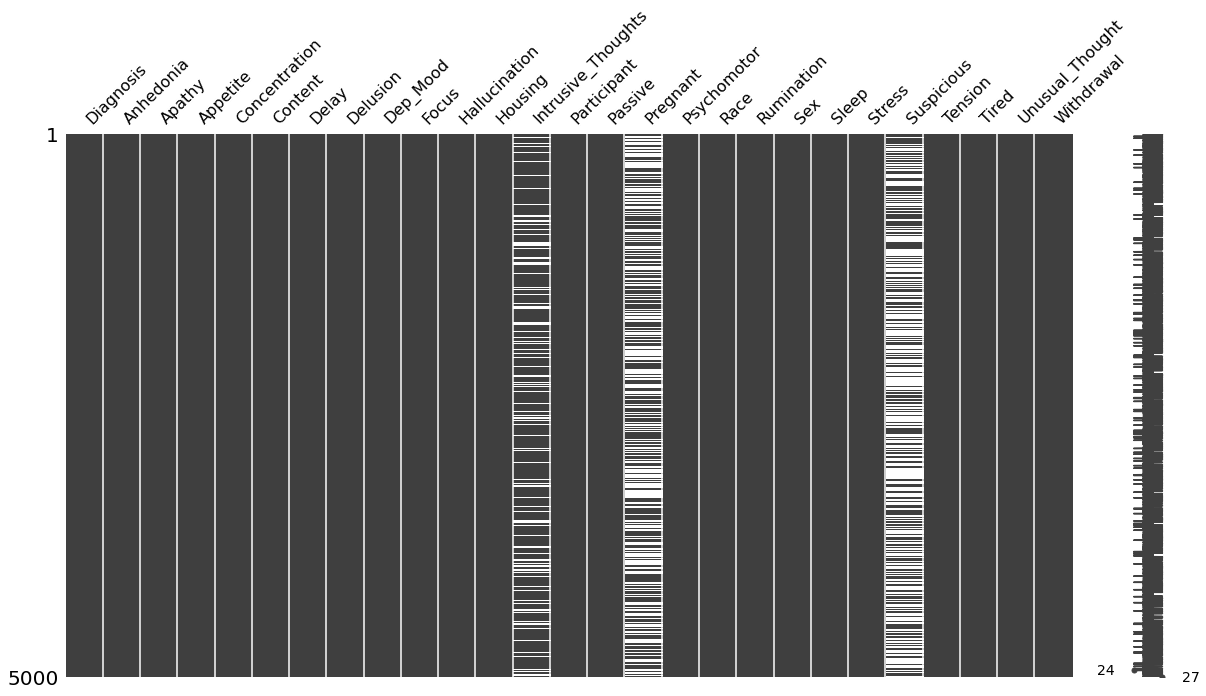

In [ ]:
# Visualizing the missing values

msno.matrix(df,figsize=(20,10))
plt.show()

# Handling Missing Values

In [ ]:
# Filling in inf values with nan

df['Tired'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Replace null values dynamically

for col in ['Intrusive_Thoughts','Suspicious','Tired']:
  fill_null_values(df, col)

Intrusive_Thoughts is filled with Mean for having a skewness of 0.13157764079280046
Suspicious is filled with Mean for having a skewness of 0.14448483052863192
Tired is filled with Mean for having a skewness of 0.08109937515820989


In [ ]:
# Replacing null values in Pregnant with 0

df['Pregnant'].fillna(0, inplace=True)

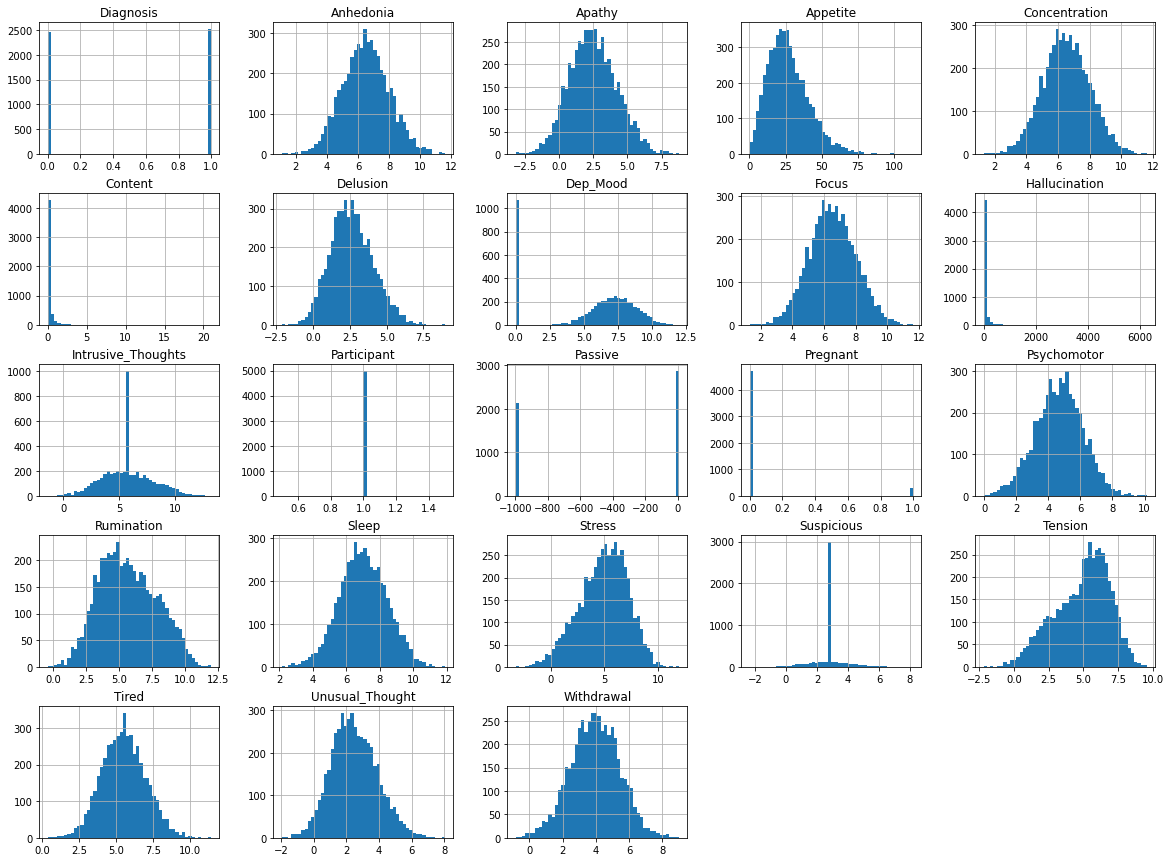

In [ ]:
# Histograms for Numerical columns

df.hist(bins=50, figsize=(20,15))
plt.show()

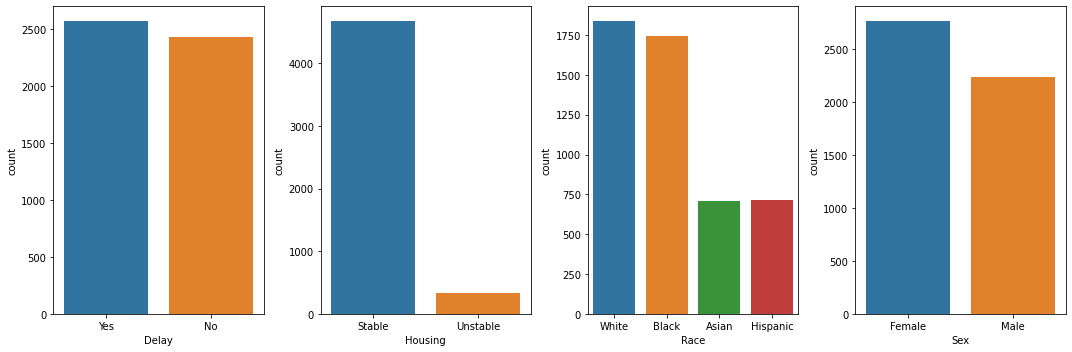

In [ ]:
# Visualizing the categorical columns

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
sns.countplot(x='Delay', data=df, ax=ax[0])
sns.countplot(x='Housing', data=df, ax=ax[1])
sns.countplot(x='Race', data=df, ax=ax[2])
sns.countplot(x='Sex', data=df, ax=ax[3])

plt.tight_layout()

plt.show()

# Encoding

In [ ]:
# Label encoding for a few columns

le = LabelEncoder()
df['Delay'] = le.fit_transform(df['Delay'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Sex'] = le.fit_transform(df['Sex'])
df = pd.get_dummies(data=df,columns=['Race'], drop_first=True)

# Data Transformation

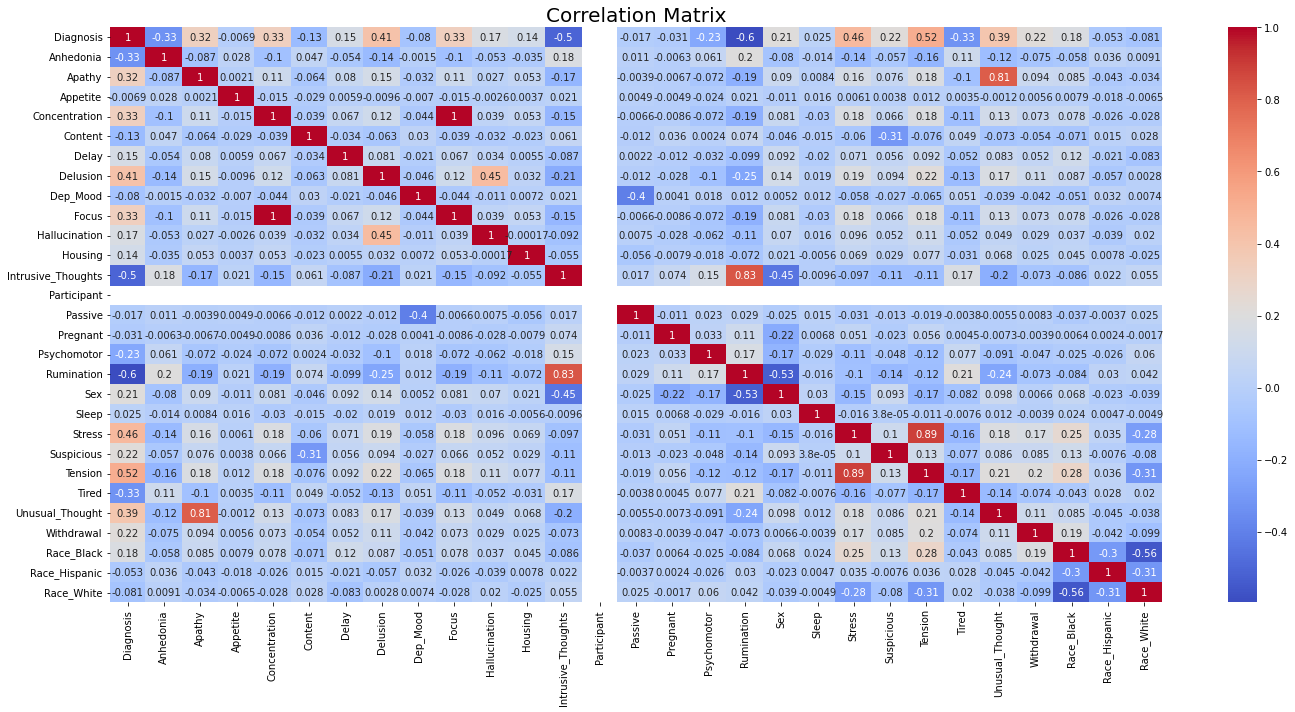

In [ ]:
# Calculate the correlation matrix

corr = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix",fontdict={"fontsize":20})
plt.tight_layout()
plt.show()

In [ ]:
# Dropping Participant column

df.drop('Participant',axis=1,inplace=True)

# Machine Learning

## Important Methods

In [ ]:
# Function to detect fitting of the model

def overfitting_underfitting(model, X_train, y_train, X_test, y_test, cv, name):
  train_scores = cross_val_score(model, X_train, y_train, cv=cv)
  test_scores = model.score(X_test, y_test)
  score_diff = train_scores.mean() - test_scores
  if score_diff >= 0:
    print(f"{name} is Overfitting")
  elif score_diff > -0.05:
    print(f"{name} is fitting the data well")
  else:
    print(f"{name} is Underfitting")

In [ ]:
# Splitting the dataset into data and label

def split_X_y(df,label):
  X = df.drop(label, axis=1)
  y = df[label]
  return X,y

In [ ]:
# Splitting the dataset into data for training and testing

def split_data(df,label):
  X,y = split_X_y(df,label)
  # Split the data into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  return X_train, X_test, y_train, y_test

In [ ]:
# Function for Feature Selection

def feature_selector(df,label):
  X,y = split_X_y(df,label)
  # Select the top k features based on the F-test score
  selector = SelectKBest(f_classif, k=10)
  X_new = selector.fit_transform(X, y)

  # Get the column names and scores of the selected features
  selected_features = X.columns[selector.get_support()]
  feature_scores = selector.scores_[selector.get_support()]
  feature_importances = pd.DataFrame({'feature': selected_features, 'importance': feature_scores})
  feature_importances = feature_importances.sort_values(by='importance', ascending=False)

  # Plot the feature importances
  plt.figure(figsize=(10, 5))
  sns.barplot(x=feature_importances['feature'], y=feature_importances['importance'])
  plt.title('Feature Importances')
  plt.xticks(rotation=90)
  plt.show()

  # Returning dataframe with selected features
  X = df[selected_features]
  # Split the data into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
# Function for Unsupervised Learning

def unsupervised_learning(X_train,X_test,n=None):
  pca = PCA(n_components=n)
  pca.fit(X_train)

  # Plot the explained variance by each principal component
  plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
  plt.show()

  # Store the explained variance ratio in a dataframe
  explained_variance = pd.DataFrame({'Explained Variance Ratio': pca.explained_variance_ratio_})

  # Print the dataframe
  print(explained_variance)

  pca.fit_transform(X_train)
  pca.transform(X_test)
  return X_train, X_test

In [ ]:
# Function for Machine Learning

def machine_learning(X_train,y_train,X_test,y_test):
  # Fit Logistic Regression with L1 and L2 regularization
  logreg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=100000)
  logreg_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=100000)

  # Fit Random Forest Classifier
  rf = RandomForestClassifier(n_estimators=100, random_state=42)

  # Fit the models on the train data
  logreg_l1.fit(X_train, y_train)
  logreg_l2.fit(X_train, y_train)
  rf.fit(X_train, y_train)

  # Predict the probabilities for each model
  logreg_l1_probs = logreg_l1.predict_proba(X_test)
  logreg_l2_probs = logreg_l2.predict_proba(X_test)
  rf_probs = rf.predict_proba(X_test)

  # Get the false positive rate and true positive rate for each model
  logreg_l1_fpr, logreg_l1_tpr, logreg_l1_thresholds = roc_curve(y_test, logreg_l1_probs[:,1])
  logreg_l2_fpr, logreg_l2_tpr, logreg_l2_thresholds = roc_curve(y_test, logreg_l2_probs[:,1])
  rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs[:,1])

  # Calculate the area under the curve (AUC) for each model
  logreg_l1_roc_auc = auc(logreg_l1_fpr, logreg_l1_tpr)
  logreg_l2_roc_auc = auc(logreg_l2_fpr, logreg_l2_tpr)
  rf_roc_auc = auc(rf_fpr, rf_tpr)

  # Plot the ROC curve for each model
  plt.figure()
  plt.plot(logreg_l1_fpr, logreg_l1_tpr, label='Logistic Regression L1 (AUC = %0.2f)' % logreg_l1_roc_auc, color='yellow')
  plt.plot(logreg_l2_fpr, logreg_l2_tpr, label='Logistic Regression L2 (AUC = %0.2f)' % logreg_l2_roc_auc, color='brown')
  plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc, color='red')
  plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  overfitting_underfitting(logreg_l1, X_train, y_train, X_test, y_test, cv=5, name="Logistic Regression L1")
  overfitting_underfitting(logreg_l2, X_train, y_train, X_test, y_test, cv=5, name="Logistic Regression L2")
  overfitting_underfitting(rf, X_train, y_train, X_test, y_test, cv=5, name="Random Forest")

## Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = split_data(df,label='Diagnosis')

## Unsupervised Learning

### PCA Before Feature Selection

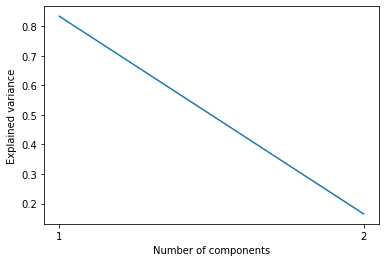

   Explained Variance Ratio
0                  0.834092
1                  0.165041


In [ ]:
X_train_pca, X_test_pca = unsupervised_learning(X_train,X_test,n=0.90)

### Feature Selection

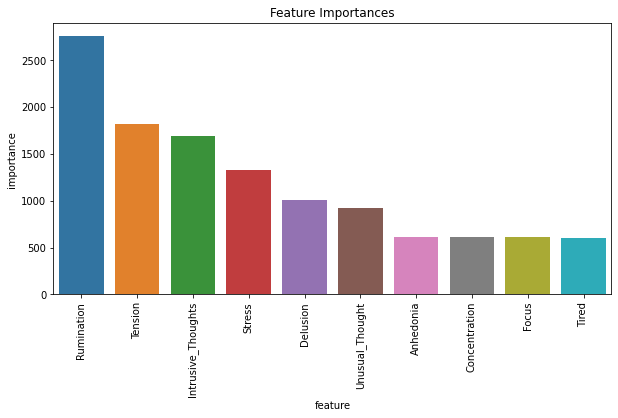

In [ ]:
X_train_ft, X_test_ft, y_train, y_test = feature_selector(df,label='Diagnosis')

### PCA After Feature Selection

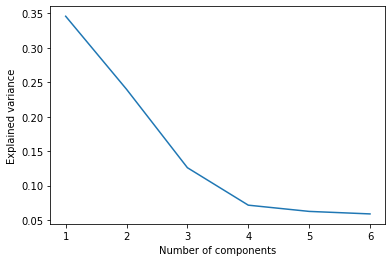

   Explained Variance Ratio
0                  0.345911
1                  0.239794
2                  0.125867
3                  0.071451
4                  0.062400
5                  0.058744


In [ ]:
X_train_ft_pca, X_test_ft_pca = unsupervised_learning(X_train_ft, X_test_ft,n=0.90)

## Machine Learning

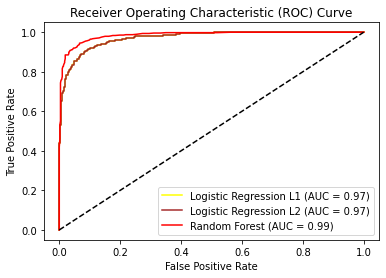

Logistic Regression L1 is Overfitting
Logistic Regression L2 is Overfitting
Random Forest is fitting the data well


In [ ]:
machine_learning(X_train,y_train,X_test,y_test)

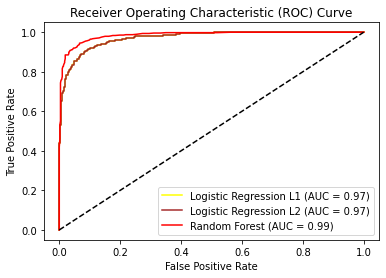

Logistic Regression L1 is Overfitting
Logistic Regression L2 is Overfitting
Random Forest is fitting the data well


In [ ]:
machine_learning(X_train_pca,y_train,X_test_pca,y_test)

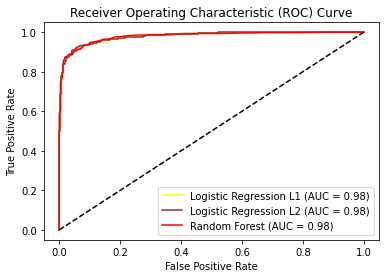

Logistic Regression L1 is fitting the data well
Logistic Regression L2 is fitting the data well
Random Forest is fitting the data well


In [ ]:
machine_learning(X_train_ft,y_train,X_test_ft,y_test)

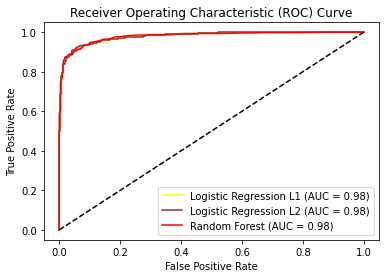

Logistic Regression L1 is fitting the data well
Logistic Regression L2 is fitting the data well
Random Forest is fitting the data well


In [ ]:
machine_learning(X_train_ft_pca,y_train,X_test_ft_pca,y_test)

# PDF Generation Code

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
from IPython.display import clear_output
clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp 'drive/My Drive/Colab Notebooks/30074801_MS4S16_Code.ipynb' './'
!jupyter nbconvert --to PDF "30074801_MS4S16_Code.ipynb"

[NbConvertApp] Converting notebook 30074801_MS4S16_Code.ipynb to PDF
[NbConvertApp] Support files will be in 30074801_MS4S16_Code_files/
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Making directory ./30074801_MS4S16_Code_files
[NbConvertApp] Writing 89667 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1